In [25]:
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from tqdm.auto import tqdm

plt.style.use('seaborn')
%matplotlib inline

In [26]:
# Load the dataframe with labels
sample = pd.read_csv('sample.csv')
sample.head()

,files,y
0,./data/dog.10669.jpg,True
1,./data/dog.5957.jpg,True
2,./data/cat.4725.jpg,False
3,./data/dog.9425.jpg,True
4,./data/cat.867.jpg,False


In [27]:
# Load the dataframes that contain features from each layer
features = [(f, pd.read_csv(f)) for f in glob('features/*')]
features = sorted(features, key=lambda x: x[0])
for f in features:
    print(f[0])

features/block1_pool.csv
features/block2_pool.csv
features/block3_pool.csv
features/block4_pool.csv
features/block5_pool.csv


In [37]:
results = []
names = []
for filename, df in tqdm(features):
    name = filename.split('/')[1].split('.')[0]
    kfold = model_selection.KFold(n_splits=10)
    scoring = 'accuracy'
    model = KNeighborsClassifier()
    cv_results = model_selection.cross_val_score(model, df, sample['y'], cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)

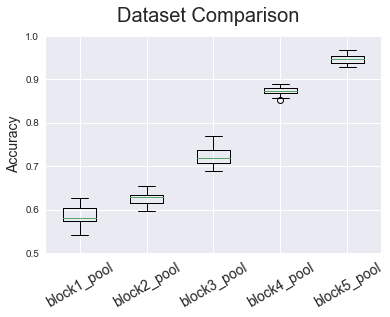

In [38]:
fig = plt.figure()
fig.suptitle('Dataset Comparison', size=20)
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
ax.set_ylim([0.5, 1.0])
plt.xticks(rotation=30, size=14)
plt.ylabel('Accuracy', size=14)
plt.show()